In [1]:
import keras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
# Setting seed for reproducability
np.random.seed(1234)  
PYTHONHASHSEED = 0
from sklearn.metrics import confusion_matrix, recall_score, precision_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Activation
%matplotlib inline

In [3]:
from pykalman import KalmanFilter
from keras.layers import Bidirectional

# DATA PREPOCESSING (DATASET- FD004)

In [4]:
train_df= pd.read_csv(r"C:\FSM_NASA\train_FD004.csv")
# Drop columns based on column index.
train_df= train_df.drop(train_df.columns[[26]],axis = 1)
train_df.head() 

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column17,Column18,Column19,Column20,Column21,Column22,Column23,Column24,Column25,Column26
0,1,1,42.0049,0.8400,100,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


In [5]:
train_df.shape

(61249, 26)

In [6]:
#setting the column names
train_df.columns=["engineNumber","cycleNumber","opSetting1","opSetting2","opSetting3","sensor1","sensor2", "sensor3","sensor4","sensor5","sensor6",
"sensor7","sensor8","sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16", "sensor17",
"sensor18","sensor19","sensor20","sensor21"]
train_df

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,42.0049,0.8400,100,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,9.9998,0.2500,100,489.05,605.33,1516.36,1315.28,10.52,...,380.16,2388.73,8185.69,8.4541,0.03,372,2319,100.00,29.11,17.5234
61245,249,252,0.0028,0.0015,100,518.67,643.42,1598.92,1426.77,14.62,...,535.02,2388.46,8185.47,8.2221,0.03,396,2388,100.00,39.38,23.7151
61246,249,253,0.0029,0.0000,100,518.67,643.68,1607.72,1430.56,14.62,...,535.41,2388.48,8193.94,8.2525,0.03,395,2388,100.00,39.78,23.8270
61247,249,254,35.0046,0.8400,100,449.44,555.77,1381.29,1148.18,5.48,...,187.92,2388.83,8125.64,9.0515,0.02,337,2223,100.00,15.26,9.0774


In [7]:
#checking for Null values
train_df.isnull().sum()

engineNumber    0
cycleNumber     0
opSetting1      0
opSetting2      0
opSetting3      0
sensor1         0
sensor2         0
sensor3         0
sensor4         0
sensor5         0
sensor6         0
sensor7         0
sensor8         0
sensor9         0
sensor10        0
sensor11        0
sensor12        0
sensor13        0
sensor14        0
sensor15        0
sensor16        0
sensor17        0
sensor18        0
sensor19        0
sensor20        0
sensor21        0
dtype: int64

In [8]:
train_df.describe()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
count,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,...,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000,61249.000000
mean,124.325181,134.311417,23.999823,0.571347,94.031576,472.882435,579.420056,1417.896600,1201.915359,8.031626,...,266.735665,2334.427590,8067.811812,9.285604,0.023252,347.760029,2228.613283,97.751396,20.864333,12.518995
std,71.995350,89.783389,14.780722,0.310703,14.251954,26.436832,37.342647,106.167598,119.327591,3.622872,...,138.479109,128.197859,85.670543,0.750374,0.004685,27.808283,145.472491,5.369424,9.936396,5.962697
min,1.000000,1.000000,0.000000,0.000000,60.000000,445.000000,535.480000,1242.670000,1024.420000,3.910000,...,128.310000,2027.570000,7845.780000,8.175700,0.020000,302.000000,1915.000000,84.930000,10.160000,6.084300
25%,60.000000,62.000000,10.004600,0.250700,100.000000,445.000000,549.330000,1350.550000,1119.490000,3.910000,...,134.520000,2387.910000,8062.630000,8.648000,0.020000,330.000000,2212.000000,100.000000,10.940000,6.566100
50%,126.000000,123.000000,25.001400,0.700000,100.000000,462.540000,555.740000,1367.680000,1136.920000,7.050000,...,183.450000,2388.060000,8083.810000,9.255600,0.020000,334.000000,2223.000000,100.000000,14.930000,8.960100
75%,185.000000,191.000000,41.998100,0.840000,100.000000,491.190000,607.070000,1497.420000,1302.620000,10.520000,...,371.400000,2388.170000,8128.350000,9.365800,0.030000,368.000000,2324.000000,100.000000,28.560000,17.135500
max,249.000000,543.000000,42.008000,0.842000,100.000000,518.670000,644.420000,1613.000000,1440.770000,14.620000,...,537.490000,2390.490000,8261.650000,11.066300,0.030000,399.000000,2388.000000,100.000000,39.890000,23.885200


In [9]:
train_df.nunique(axis=0)  

engineNumber      249
cycleNumber       543
opSetting1        536
opSetting2        105
opSetting3          2
sensor1             6
sensor2          1704
sensor3         13558
sensor4         17353
sensor5             6
sensor6            46
sensor7          5926
sensor8          1038
sensor9         25297
sensor10           21
sensor11          737
sensor12         5627
sensor13          483
sensor14        15938
sensor15        11915
sensor16            2
sensor17           54
sensor18            6
sensor19            2
sensor20          652
sensor21        21574
dtype: int64

In [10]:
train_df.dtypes

engineNumber      int64
cycleNumber       int64
opSetting1      float64
opSetting2      float64
opSetting3        int64
sensor1         float64
sensor2         float64
sensor3         float64
sensor4         float64
sensor5         float64
sensor6         float64
sensor7         float64
sensor8         float64
sensor9         float64
sensor10        float64
sensor11        float64
sensor12        float64
sensor13        float64
sensor14        float64
sensor15        float64
sensor16        float64
sensor17          int64
sensor18          int64
sensor19        float64
sensor20        float64
sensor21        float64
dtype: object

In [11]:
train_df = train_df.sort_values(['engineNumber','cycleNumber'])
train_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,42.0049,0.8400,100,445.00,549.68,1343.43,1112.93,3.91,...,129.78,2387.99,8074.83,9.3335,0.02,330,2212,100.00,10.62,6.3670
1,1,2,20.0020,0.7002,100,491.19,606.07,1477.61,1237.50,9.35,...,312.59,2387.73,8046.13,9.1913,0.02,361,2324,100.00,24.37,14.6552
2,1,3,42.0038,0.8409,100,445.00,548.95,1343.12,1117.05,3.91,...,129.62,2387.97,8066.62,9.4007,0.02,329,2212,100.00,10.48,6.4213
3,1,4,42.0000,0.8400,100,445.00,548.70,1341.24,1118.03,3.91,...,129.80,2388.02,8076.05,9.3369,0.02,328,2212,100.00,10.54,6.4176
4,1,5,25.0063,0.6207,60,462.54,536.10,1255.23,1033.59,7.05,...,164.11,2028.08,7865.80,10.8366,0.02,305,1915,84.93,14.03,8.6754


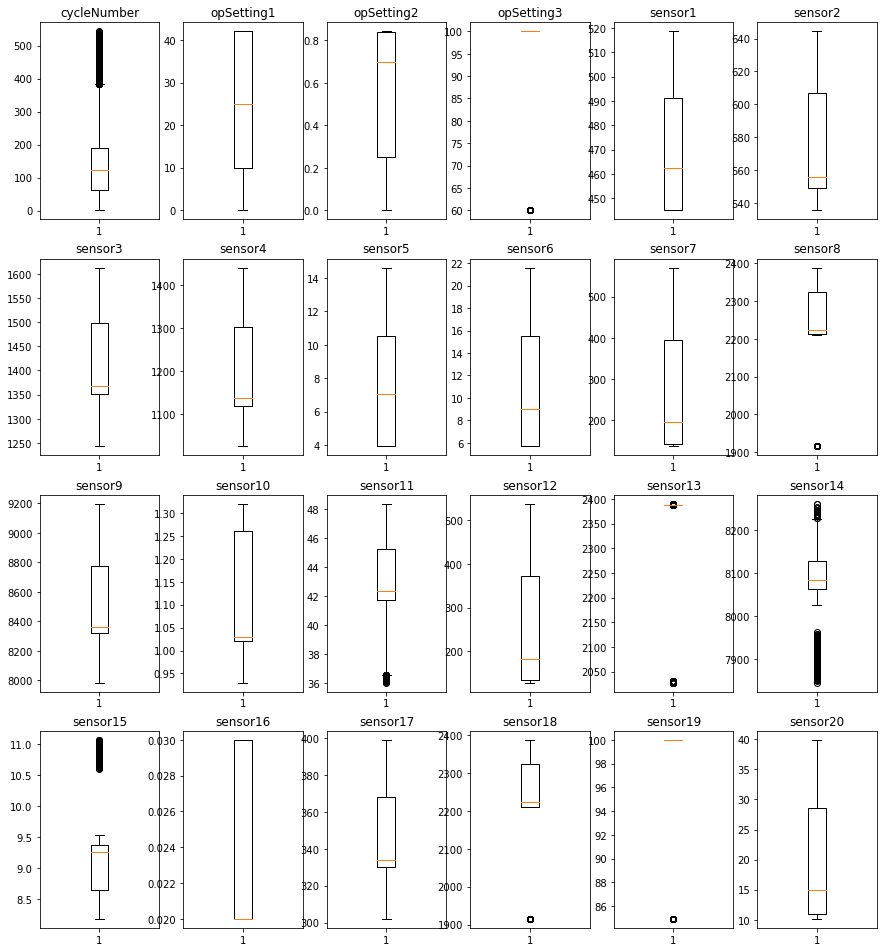

In [12]:
plt.figure(figsize = (15, 21))
for i in np.arange(1, 25):        # column 5 in python means actual 6th column
  temp = train_df.iloc[:, i]
  plt.subplot(5,6, i)
  plt.boxplot(temp)           # Make a box and whisker plot.
  plt.title(train_df.columns[i])
plt.show()

from the box plot we can observe that the plots with constant represents the varaibles that poor dependency of the respective varaibles with the dataset.the varaibles are 'Opsetting3','sensor8', 'sensor13','sensor15','sensor19','sensor16','sensor18'

In [13]:
for cols in train_df.columns:
    if cols == 'engineNumber':
        continue;
    if cols == 'cycleNumber':
        continue;
    else:
        print(cols)
        kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = train_df[cols].values[0],
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=.01)
        state_means,_ = kf.filter(train_df[cols].values)
        train_df[cols] = state_means.flatten()

opSetting1
opSetting2
opSetting3
sensor1
sensor2
sensor3
sensor4
sensor5
sensor6
sensor7
sensor8
sensor9
sensor10
sensor11
sensor12
sensor13
sensor14
sensor15
sensor16
sensor17
sensor18
sensor19
sensor20
sensor21


In [14]:
test_df= pd.read_csv(r"C:\FSM_NASA\test_FD004.csv")
# Drop columns based on column index.
test_df= test_df.drop(test_df.columns[[26]],axis = 1)
test_df.columns=["engineNumber","cycleNumber","opSetting1","opSetting2","opSetting3","sensor1","sensor2", "sensor3","sensor4","sensor5","sensor6",
"sensor7","sensor8","sensor9","sensor10","sensor11","sensor12","sensor13","sensor14","sensor15","sensor16", "sensor17",
"sensor18","sensor19","sensor20","sensor21"]
test_df.head()  

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor12,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21
0,1,1,20.0072,0.7000,100,491.19,606.67,1481.04,1227.81,9.35,...,313.03,2387.78,8048.98,9.2229,0.02,362,2324,100.00,24.31,14.7007
1,1,2,24.9984,0.6200,60,462.54,536.22,1256.17,1031.48,7.05,...,163.61,2028.09,7863.46,10.8632,0.02,306,1915,84.93,14.36,8.5748
2,1,3,42.0000,0.8420,100,445.00,549.23,1340.13,1105.88,3.91,...,129.98,2387.95,8071.13,9.3960,0.02,328,2212,100.00,10.39,6.4365
3,1,4,42.0035,0.8402,100,445.00,549.19,1339.70,1107.26,3.91,...,129.48,2387.90,8078.89,9.3594,0.02,328,2212,100.00,10.56,6.2367
4,1,5,35.0079,0.8400,100,449.44,555.10,1353.04,1117.80,5.48,...,181.82,2387.87,8057.83,9.3030,0.02,333,2223,100.00,14.85,8.9326


In [15]:
truth_df= pd.read_csv(r"C:\FSM_NASA\RUL_FD004.csv")  
truth_df= truth_df.drop(truth_df.columns[[1]],axis = 1)
truth_df.head()

,Column1
0,22
1,39
2,107
3,75
4,149


In [16]:
for cols in test_df.columns:
    if cols == 'engineNumber':
        continue;
    if cols == 'cycleNumber':
        continue;
    else:
        print(cols)
        kf = KalmanFilter(transition_matrices = [1],
                      observation_matrices = [1],
                      initial_state_mean = test_df[cols].values[0],
                      initial_state_covariance = 1,
                      observation_covariance=1,
                      transition_covariance=.01)
        state_means,_ = kf.filter(test_df[cols].values)
        test_df[cols] = state_means.flatten()

opSetting1
opSetting2
opSetting3
sensor1
sensor2
sensor3
sensor4
sensor5
sensor6
sensor7
sensor8
sensor9
sensor10
sensor11
sensor12
sensor13
sensor14
sensor15
sensor16
sensor17
sensor18
sensor19
sensor20
sensor21


In [17]:
# observing the maximum cycle of each engine
max_cycles_df = train_df.groupby(["engineNumber"], sort=False)["cycleNumber"].max().reset_index().rename(columns={"CyclecycleNumber" : "MaxCycle_engineNumber"})
max_cycles_df

,engineNumber,cycleNumber
0,1,321
1,2,299
2,3,307
3,4,274
4,5,193
...,...,...
244,245,205
245,246,161
246,247,211
247,248,184


RUL = EOL - Cycle

RUL = Remaining Useful Life

EOL = End of Life in cycles

In [18]:
#CALCULATING THE END LIFE OF EACH ENGINE
EOL=[]
for sl_no in train_df['engineNumber']:
       EOL.append( ((train_df[train_df['engineNumber'] == sl_no]["cycleNumber"]).values)[-1]) 

In [19]:
#FINDING THE EOL OF THE FIRST ENGINE TO VERIFY THE MAX_CYCLES DATAFRAME
((train_df[train_df['engineNumber'] == 1]["cycleNumber"]).values)[-1]

321

THE FINDINGS OF THE ENGINE 1 EOL SEEMS TO RELATE WITH THE MAX_CYCLES DATAFRAME

In [20]:
#FINDING THE SHAPE OF THE E0L
np.shape(EOL)

(61249,)

the shape of the EOL corresponds to the total number of rows

In [21]:
#as we have evaluated the EOL for its truthfulness of the data, now we can combine EOL into our train dataframe
train_df["EOL"]=EOL
train_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,EOL
0,1,1,42.004900,0.840000,100.000000,445.000000,549.680000,1343.430000,1112.930000,3.910000,...,2387.990000,8074.830000,9.333500,0.02,330.000000,2212.000000,100.000000,10.620000,6.367000,321
1,1,2,34.573457,0.792783,100.000000,460.600596,568.725629,1388.749073,1155.003311,5.747351,...,2387.902185,8065.136623,9.285472,0.02,340.470199,2249.827815,100.000000,15.264040,9.166326,321
2,1,3,36.490647,0.805198,100.000000,456.575303,563.623087,1376.975781,1145.210533,5.273275,...,2387.919683,8065.519366,9.315203,0.02,337.510638,2240.067417,100.000000,14.029654,8.458050,321
3,1,4,37.655159,0.812554,100.000000,454.128632,560.468795,1369.422310,1139.465384,4.985119,...,2387.940887,8067.745226,9.319789,0.02,335.500375,2234.134808,100.000000,13.292046,8.026760,321
4,1,5,35.362588,0.777781,92.750109,455.653169,556.052017,1348.725265,1120.275760,5.359373,...,2322.717083,8031.143205,9.594707,0.02,329.972265,2176.292495,97.268604,13.425798,8.144324,321


In [22]:
train_df["RUL"] = train_df["EOL"]-train_df["cycleNumber"]
train_df = train_df.drop(columns=['EOL'])
train_df

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL
0,1,1,42.004900,0.840000,100.000000,445.000000,549.680000,1343.430000,1112.930000,3.910000,...,2387.990000,8074.830000,9.333500,0.020000,330.000000,2212.000000,100.000000,10.620000,6.367000,320
1,1,2,34.573457,0.792783,100.000000,460.600596,568.725629,1388.749073,1155.003311,5.747351,...,2387.902185,8065.136623,9.285472,0.020000,340.470199,2249.827815,100.000000,15.264040,9.166326,319
2,1,3,36.490647,0.805198,100.000000,456.575303,563.623087,1376.975781,1145.210533,5.273275,...,2387.919683,8065.519366,9.315203,0.020000,337.510638,2240.067417,100.000000,14.029654,8.458050,318
3,1,4,37.655159,0.812554,100.000000,454.128632,560.468795,1369.422310,1139.465384,4.985119,...,2387.940887,8067.745226,9.319789,0.020000,335.500375,2234.134808,100.000000,13.292046,8.026760,317
4,1,5,35.362588,0.777781,92.750109,455.653169,556.052017,1348.725265,1120.275760,5.359373,...,2322.717083,8031.143205,9.594707,0.020000,329.972265,2176.292495,97.268604,13.425798,8.144324,316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61244,249,251,27.767690,0.633501,95.377548,466.842756,573.149687,1412.035615,1195.962684,7.081737,...,2346.967983,8107.281540,9.126750,0.023506,346.301165,2225.606296,98.258491,18.734580,11.243890,4
61245,249,252,25.126557,0.573382,95.817258,471.772818,579.834145,1429.812977,1217.918212,7.798813,...,2350.914908,8114.719211,9.040696,0.024124,351.028763,2241.053985,98.424152,20.698474,12.430213,3
61246,249,253,22.736671,0.518839,96.215141,476.233909,585.907477,1446.736369,1238.145746,8.447678,...,2354.488284,8122.255082,8.965719,0.024683,355.211523,2255.032213,98.574054,22.513603,13.514331,2
61247,249,254,23.903657,0.549390,96.575176,473.685140,583.040652,1440.510788,1229.587761,8.165378,...,2357.755037,8122.577072,8.973879,0.024237,353.479153,2251.985151,98.709697,21.823605,13.092269,1


now we have found the RUL of the engines

In [23]:
# generate label columns for training data
w1 = 30
w0 = 15
train_df['label1'] = np.where(train_df['RUL'] <= w1, 1, 0 )
train_df['label2'] = train_df['label1']
train_df.loc[train_df['RUL'] <= w0, 'label2'] = 2
train_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,label1,label2
0,1,1,42.004900,0.840000,100.000000,445.000000,549.680000,1343.430000,1112.930000,3.910000,...,9.333500,0.02,330.000000,2212.000000,100.000000,10.620000,6.367000,320,0,0
1,1,2,34.573457,0.792783,100.000000,460.600596,568.725629,1388.749073,1155.003311,5.747351,...,9.285472,0.02,340.470199,2249.827815,100.000000,15.264040,9.166326,319,0,0
2,1,3,36.490647,0.805198,100.000000,456.575303,563.623087,1376.975781,1145.210533,5.273275,...,9.315203,0.02,337.510638,2240.067417,100.000000,14.029654,8.458050,318,0,0
3,1,4,37.655159,0.812554,100.000000,454.128632,560.468795,1369.422310,1139.465384,4.985119,...,9.319789,0.02,335.500375,2234.134808,100.000000,13.292046,8.026760,317,0,0
4,1,5,35.362588,0.777781,92.750109,455.653169,556.052017,1348.725265,1120.275760,5.359373,...,9.594707,0.02,329.972265,2176.292495,97.268604,13.425798,8.144324,316,0,0


In [24]:
# MinMax normalization
train_df['cycle_norm'] = train_df['cycleNumber']
cols_normalize = train_df.columns.difference(['engineNumber','cycleNumber','RUL','label1','label2'])
min_max_scaler = preprocessing.MinMaxScaler()
norm_train_df = pd.DataFrame(min_max_scaler.fit_transform(train_df[cols_normalize]), 
                             columns=cols_normalize, 
                             index=train_df.index)
join_df = train_df[train_df.columns.difference(cols_normalize)].join(norm_train_df)
train_df = join_df.reindex(columns = train_df.columns)
train_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,RUL,label1,label2,cycle_norm
0,1,1,1.000000,1.000000,1.000000,0.000000,0.000000,0.070476,0.043167,0.000000,...,0.0,0.107279,0.552128,1.000000,0.000000,0.000000,320,0,0,0.000000
1,1,2,0.755992,0.915858,1.000000,0.304672,0.308240,0.319135,0.245425,0.247366,...,0.0,0.326991,0.700741,1.000000,0.238784,0.239661,319,0,0,0.001845
2,1,3,0.818942,0.937982,1.000000,0.226060,0.225659,0.254536,0.198348,0.183541,...,0.0,0.264886,0.662395,1.000000,0.175315,0.179023,318,0,0,0.003690
3,1,4,0.857178,0.951091,1.000000,0.178278,0.174609,0.213092,0.170730,0.144746,...,0.0,0.222702,0.639088,1.000000,0.137389,0.142098,317,0,0,0.005535
4,1,5,0.781903,0.889125,0.693018,0.208051,0.103127,0.099530,0.078480,0.195132,...,0.0,0.106697,0.411846,0.693018,0.144267,0.152164,316,0,0,0.007380


In [25]:
test_df['cycle_norm'] = test_df['cycleNumber']
norm_test_df = pd.DataFrame(min_max_scaler.transform(test_df[cols_normalize]), 
                            columns=cols_normalize, 
                            index=test_df.index)
test_join_df = test_df[test_df.columns.difference(cols_normalize)].join(norm_test_df)
test_df = test_join_df.reindex(columns = test_df.columns)
test_df = test_df.reset_index(drop=True)
test_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,cycle_norm
0,1,1,0.277716,0.750517,1.000000,0.902068,0.922343,0.825521,0.595426,0.732399,...,0.999011,0.368177,0.401965,0.0,0.778782,0.992137,1.000000,0.703903,0.713480,0.000000
1,1,2,0.333068,0.702367,0.427949,0.713091,0.537248,0.408798,0.276656,0.627814,...,0.426988,0.090186,0.789527,0.0,0.381884,0.449437,0.427949,0.531110,0.536344,0.001845
2,1,3,0.505109,0.780083,0.575551,0.529098,0.396747,0.316831,0.207666,0.465824,...,0.574789,0.187270,0.720773,0.0,0.300201,0.475934,0.575551,0.391021,0.399491,0.003690
3,1,4,0.609705,0.826642,0.665267,0.417263,0.311210,0.260433,0.167134,0.367363,...,0.664576,0.253556,0.673570,0.0,0.250552,0.492039,0.665267,0.307719,0.312693,0.005535
4,1,5,0.638804,0.858063,0.725936,0.357351,0.270703,0.235561,0.148909,0.339090,...,0.725268,0.281447,0.634498,0.0,0.235995,0.510763,0.725936,0.291366,0.295829,0.007380


In [26]:
# generate column max for test data
rul = pd.DataFrame(test_df.groupby('engineNumber')['cycleNumber'].max()).reset_index()
rul.columns = ['engineNumber', 'max']
truth_df.columns = ['more']
truth_df['engineNumber'] = truth_df.index + 1
truth_df['max'] = rul['max'] + truth_df['more']
truth_df.drop('more', axis=1, inplace=True)

In [27]:
# generate RUL for test data
test_df = test_df.merge(truth_df, on=['engineNumber'], how='left')
test_df['RUL'] = test_df['max'] - test_df['cycleNumber']
test_df.drop('max', axis=1, inplace=True)
test_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,cycle_norm,RUL
0,1,1,0.277716,0.750517,1.000000,0.902068,0.922343,0.825521,0.595426,0.732399,...,0.368177,0.401965,0.0,0.778782,0.992137,1.000000,0.703903,0.713480,0.000000,251
1,1,2,0.333068,0.702367,0.427949,0.713091,0.537248,0.408798,0.276656,0.627814,...,0.090186,0.789527,0.0,0.381884,0.449437,0.427949,0.531110,0.536344,0.001845,250
2,1,3,0.505109,0.780083,0.575551,0.529098,0.396747,0.316831,0.207666,0.465824,...,0.187270,0.720773,0.0,0.300201,0.475934,0.575551,0.391021,0.399491,0.003690,249
3,1,4,0.609705,0.826642,0.665267,0.417263,0.311210,0.260433,0.167134,0.367363,...,0.253556,0.673570,0.0,0.250552,0.492039,0.665267,0.307719,0.312693,0.005535,248
4,1,5,0.638804,0.858063,0.725936,0.357351,0.270703,0.235561,0.148909,0.339090,...,0.281447,0.634498,0.0,0.235995,0.510763,0.725936,0.291366,0.295829,0.007380,247


In [28]:
# generate label columns w0 and w1 for test data
test_df['label1'] = np.where(test_df['RUL'] <= w1, 1, 0 )
test_df['label2'] = test_df['label1']
test_df.loc[test_df['RUL'] <= w0, 'label2'] = 2
test_df.head()

,engineNumber,cycleNumber,opSetting1,opSetting2,opSetting3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,cycle_norm,RUL,label1,label2
0,1,1,0.277716,0.750517,1.000000,0.902068,0.922343,0.825521,0.595426,0.732399,...,0.0,0.778782,0.992137,1.000000,0.703903,0.713480,0.000000,251,0,0
1,1,2,0.333068,0.702367,0.427949,0.713091,0.537248,0.408798,0.276656,0.627814,...,0.0,0.381884,0.449437,0.427949,0.531110,0.536344,0.001845,250,0,0
2,1,3,0.505109,0.780083,0.575551,0.529098,0.396747,0.316831,0.207666,0.465824,...,0.0,0.300201,0.475934,0.575551,0.391021,0.399491,0.003690,249,0,0
3,1,4,0.609705,0.826642,0.665267,0.417263,0.311210,0.260433,0.167134,0.367363,...,0.0,0.250552,0.492039,0.665267,0.307719,0.312693,0.005535,248,0,0
4,1,5,0.638804,0.858063,0.725936,0.357351,0.270703,0.235561,0.148909,0.339090,...,0.0,0.235995,0.510763,0.725936,0.291366,0.295829,0.007380,247,0,0


In [29]:
train_df.drop(['label1','label2'],axis=1,inplace=True)
test_df.drop(['label1','label2'],axis=1,inplace=True)

In [30]:
# pick a large window size of 50 cycles
sequence_length = 50

In [31]:
# preparing data for visualizations 
# window of 50 cycles prior to a failure point for engine id 3
engine_id3 = test_df[test_df['engineNumber'] == 3]
engine_id3_50cycleWindow = engine_id3[engine_id3['RUL'] <= engine_id3['RUL'].min() + 50]
cols1 = ['sensor1', 'sensor2', 'sensor3', 'sensor4', 'sensor5', 'sensor6', 'sensor7', 'sensor8', 'sensor9', 'sensor10']
engine_id3_50cycleWindow1 = engine_id3_50cycleWindow[cols1]
cols2 = ['sensor11', 'sensor12', 'sensor13', 'sensor14', 'sensor15', 'sensor16', 'sensor17', 'sensor18', 'sensor19', 'sensor20', 'sensor21']
engine_id3_50cycleWindow2 = engine_id3_50cycleWindow[cols2]

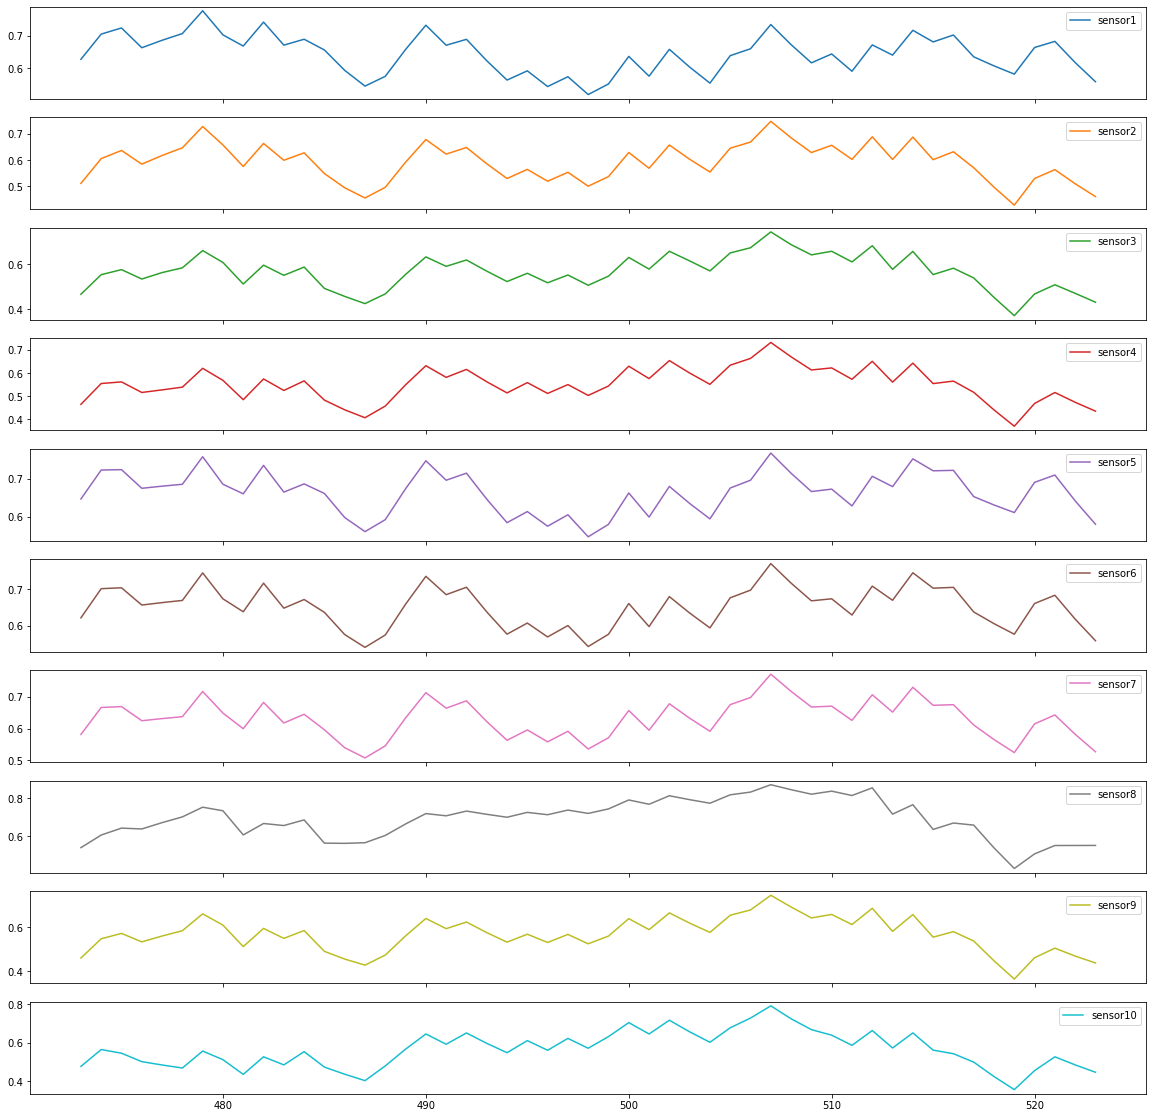

In [32]:
# plotting sensor data for engine ID 3 prior to a failure point - sensors 1-10 
ax1 = engine_id3_50cycleWindow1.plot(subplots=True, sharex=True, figsize=(20,20))

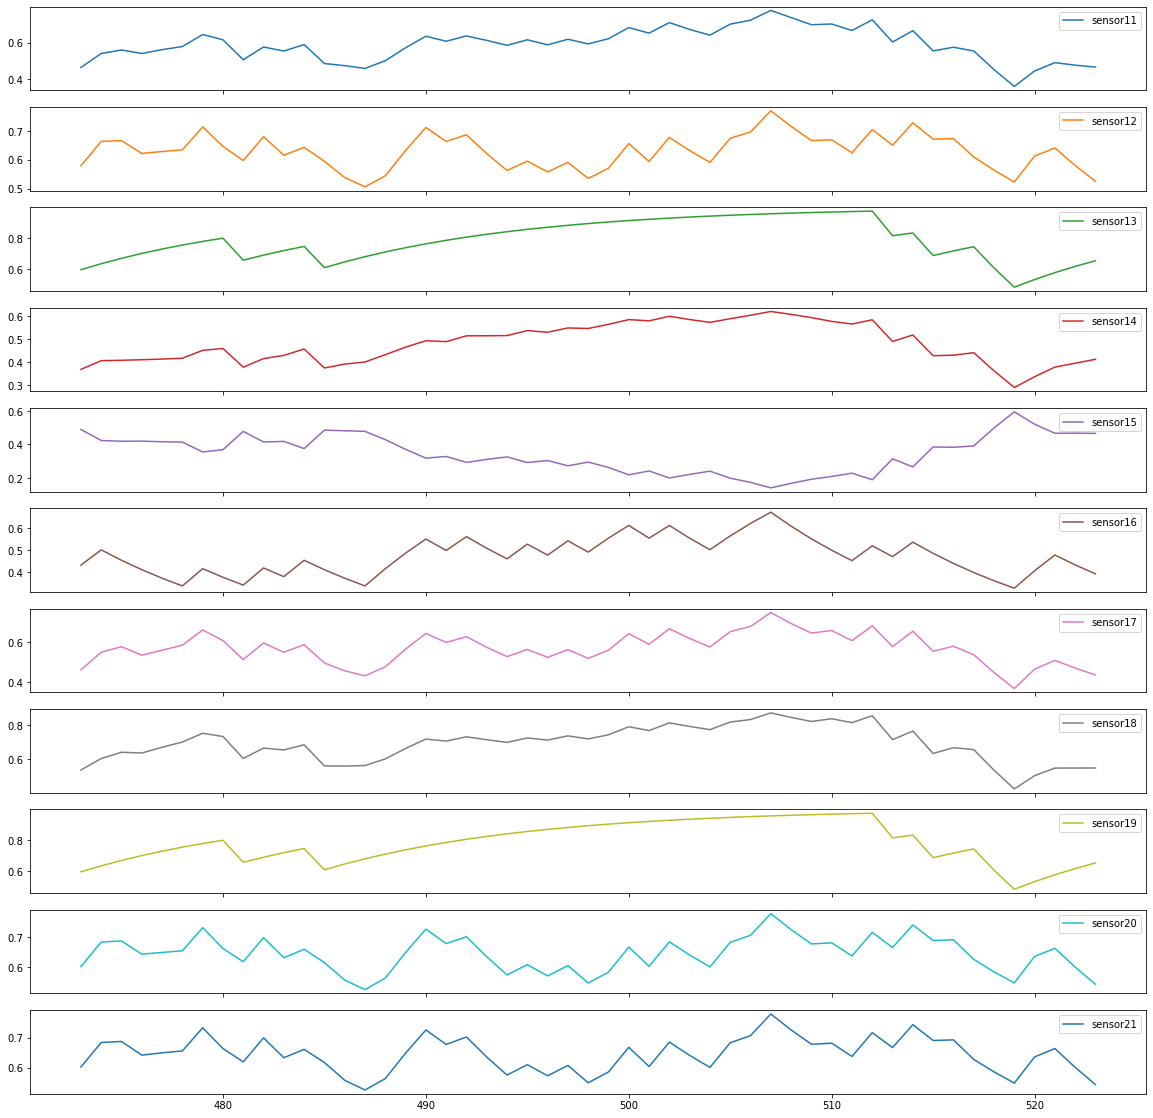

In [33]:
# plotting sensor data for engine ID 3 prior to a failure point - sensors 11-21 
ax2 = engine_id3_50cycleWindow2.plot(subplots=True, sharex=True, figsize=(20,20))

In [34]:
# function to reshape features into (samples, time steps, features) 
def gen_sequence(id_df, seq_length, seq_cols):
    """ Only sequences that meet the window-length are considered, no padding is used. This means for testing
    we need to drop those which are below the window-length. An alternative would be to pad sequences so that
    we can use shorter ones """
    data_array = id_df[seq_cols].values
    num_elements = data_array.shape[0]
    for start, stop in zip(range(0, num_elements-seq_length), range(seq_length, num_elements)):
        yield data_array[start:stop, :]

In [35]:
# pick the feature columns 
sensor_cols = ['sensor' + str(i) for i in range(1,22)]
sequence_cols = ['opSetting1', 'opSetting2', 'opSetting3', 'cycle_norm']
sequence_cols.extend(sensor_cols)

In [36]:
# generator for the sequences
seq_gen = (list(gen_sequence(train_df[train_df['engineNumber']==engineNumber], sequence_length, sequence_cols)) 
           for engineNumber in train_df['engineNumber'].unique())

In [37]:
# generate sequences and convert to numpy array
seq_array = np.concatenate(list(seq_gen)).astype(np.float32)
seq_array.shape

(48799, 50, 25)

In [38]:
# function to generate labels
def gen_labels(id_df, seq_length, label):
    data_array = id_df[label].values
    num_elements = data_array.shape[0]
    return data_array[seq_length:num_elements, :]

In [39]:
# generate labels
label_gen = [gen_labels(train_df[train_df['engineNumber']==engineNumber], sequence_length, ['RUL']) 
             for engineNumber in train_df['engineNumber'].unique()]
label_array = np.concatenate(label_gen).astype(np.float32)
label_array.shape

(48799, 1)

In [40]:
# build the network
nb_features = seq_array.shape[2]
nb_out = label_array.shape[1]

model = Sequential()
model.add(LSTM(
         units=100,
         return_sequences=True,
         input_shape=(sequence_length, nb_features)))
model.add(Dropout(0.4))

model.add(LSTM(
          units=100,
          return_sequences=False))
model.add(Dropout(0.4))
model.add(Dense(units=1, activation='relu'))
model.add(Activation("relu"))
model.compile(loss="mse", optimizer="rmsprop", metrics=['mse'])

In [41]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 100)           50400     
                                                                 
 dropout (Dropout)           (None, 50, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
 activation (Activation)     (None, 1)                 0         
                                                                 
Total params: 130,901
Trainable params: 130,901
Non-trai

In [42]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

STAMP = 'predictive_regression_kalhman'
print(STAMP)

early_stopping =EarlyStopping(monitor='val_loss', patience=10)
bst_model_path = STAMP + '.h5'
model_checkpoint = ModelCheckpoint(bst_model_path, save_best_only=True, save_weights_only=True)

predictive_regression_kalhman


In [43]:
%%time
# fit the network
hist = model.fit(seq_array, label_array, epochs=1000, batch_size=200, validation_split=0.05, verbose=1,callbacks=[early_stopping, model_checkpoint])

Epoch 1/1000
232/232 [==============================] - 47s 170ms/step - loss: 14109.2676 - mse: 14109.2676 - val_loss: 9949.0391 - val_mse: 9949.0391
Epoch 2/1000
232/232 [==============================] - 38s 164ms/step - loss: 10546.6182 - mse: 10546.6182 - val_loss: 7339.5771 - val_mse: 7339.5771
Epoch 3/1000
232/232 [==============================] - 58s 251ms/step - loss: 8143.9053 - mse: 8143.9053 - val_loss: 5795.2173 - val_mse: 5795.2173
Epoch 4/1000
232/232 [==============================] - 55s 237ms/step - loss: 6851.4355 - mse: 6851.4355 - val_loss: 5274.4683 - val_mse: 5274.4683
Epoch 5/1000
232/232 [==============================] - 51s 219ms/step - loss: 6454.2485 - mse: 6454.2485 - val_loss: 5292.0679 - val_mse: 5292.0679
Epoch 6/1000
232/232 [==============================] - 52s 223ms/step - loss: 6408.5474 - mse: 6408.5474 - val_loss: 4953.7041 - val_mse: 4953.7041
Epoch 7/1000
232/232 [==============================] - 50s 214ms/step - loss: 6268.2720 - mse: 6268.2

In [44]:
model.load_weights(bst_model_path)

In [45]:
# training metrics
scores = model.evaluate(seq_array, label_array, verbose=1, batch_size=200)
print('Score: {}'.format(scores[1]))

244/244 [==============================] - 12s 49ms/step - loss: 1699.6685 - mse: 1699.6686
Score: 1699.6685791015625


In [46]:
seq_array_test_last = [test_df[test_df['engineNumber']==engineNumber][sequence_cols].values[-sequence_length:] 
                       for engineNumber in test_df['engineNumber'].unique() if len(test_df[test_df['engineNumber']==engineNumber]) >= sequence_length]

seq_array_test_last = np.asarray(seq_array_test_last).astype(np.float32)
seq_array_test_last.shape


(228, 50, 25)

In [47]:
y_mask = [len(test_df[test_df['engineNumber']==engineNumber]) >= sequence_length for engineNumber in test_df['engineNumber'].unique()]

In [48]:
label_array_test_last = test_df.groupby('engineNumber')['RUL'].nth(-1)[y_mask].values
label_array_test_last = label_array_test_last.reshape(label_array_test_last.shape[0],1).astype(np.float32)
label_array_test_last.shape

(228, 1)

In [49]:
print(seq_array_test_last.shape)
print(label_array_test_last.shape)

(228, 50, 25)
(228, 1)


In [50]:
# test metrics
import math
scores_test = model.evaluate(seq_array_test_last, label_array_test_last, verbose=2)
print('Test Score: %.2f MSE (%.2f RMSE)' % (scores_test[0], math.sqrt(scores_test[0])))

8/8 - 0s - loss: 1009.8514 - mse: 1009.8514 - 102ms/epoch - 13ms/step
Test Score: 1009.85 MSE (31.78 RMSE)


In [51]:
pred = model.predict(seq_array_test_last)
pred

8/8 [==============================] - 1s 12ms/step


array([[ 22.891666 ],
       [ 44.017452 ],
       [170.79608  ],
       [ 79.71948  ],
       [ 59.06014  ],
       [130.69191  ],
       [ 79.866394 ],
       [  7.441783 ],
       [143.13066  ],
       [204.0609   ],
       [ 10.783462 ],
       [ 98.24002  ],
       [ 83.62866  ],
       [ 18.875315 ],
       [150.71693  ],
       [139.28429  ],
       [ 82.21097  ],
       [ 84.34831  ],
       [ 87.12459  ],
       [ 11.582625 ],
       [ 26.44892  ],
       [135.18378  ],
       [ 30.389515 ],
       [ 81.41075  ],
       [ 75.7771   ],
       [ 47.545906 ],
       [120.280655 ],
       [ 13.835175 ],
       [  9.310932 ],
       [182.63736  ],
       [131.35066  ],
       [ 19.616547 ],
       [ 56.789257 ],
       [ 74.93227  ],
       [ 21.014666 ],
       [ 84.873764 ],
       [ 11.98779  ],
       [ 90.55983  ],
       [ 39.817177 ],
       [ 76.30722  ],
       [ 43.26823  ],
       [105.85625  ],
       [ 23.532833 ],
       [ 52.10673  ],
       [ 25.0757   ],
       [ 9

In [52]:
diff = []
ratio = []
pred = model.predict(seq_array_test_last)
for u in range(len(label_array_test_last)):
    pr = pred[u][0]
    ratio.append((label_array_test_last[u] / pr) - 1)
    diff.append(abs(label_array_test_last[u] - pr))

8/8 [==============================] - 0s 11ms/step


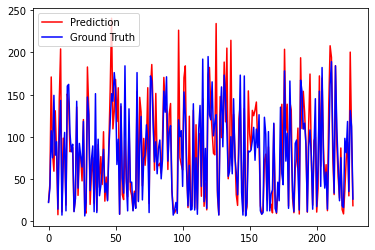

In [53]:
import matplotlib.pyplot as plt

plt.plot(pred, color='red', label='Prediction')
plt.plot(label_array_test_last, color='blue', label='Ground Truth')
plt.legend(loc='upper left')
plt.show()

In [54]:
error = pd.DataFrame((label_array_test_last - pred),columns=['error'])
error.describe()

,error
count,228.000000
mean,-3.830172
std,31.615896
min,-114.275650
25%,-16.684093
50%,-1.065644
75%,12.601260
max,89.939865
